In [54]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Getting df From Yahoo using Ticker

In [66]:
#Downloading df
ticker = 'TATAMOTORS.NS'  # Example ticker
start_date = '1999-01-01'
end_date = '2024-04-24'
df = yf.download(ticker, start=start_date, end=end_date)
df.to_csv("Tatastockdfset.csv")

[*********************100%%**********************]  1 of 1 completed


In [67]:
df = pd.read_csv("Tatastockdfset.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-01,31.599886,32.155613,31.053738,31.839424,24.766424,18835718
1,1999-01-04,32.021473,32.663437,31.561560,31.676538,24.639723,18245781
2,1999-01-05,31.714865,34.215645,31.283695,34.215645,26.614777,38938718
3,1999-01-06,34.637230,35.317520,33.870708,35.221703,27.397339,40059886
4,1999-01-07,35.269611,36.850563,35.164215,36.697258,28.545116,35983032
...,...,...,...,...,...,...,...
6324,2024-04-16,990.000000,1004.900024,982.099976,992.799988,992.799988,9574762
6325,2024-04-18,996.349976,1003.099976,966.250000,971.349976,971.349976,13540490
6326,2024-04-19,964.000000,967.950012,944.000000,963.200012,963.200012,15381310
6327,2024-04-22,978.750000,978.750000,966.000000,973.549988,973.549988,7187959


Data cleaning

In [57]:
missing_count = df.isna().sum()
print(missing_count)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [58]:
import pandas as pd
import ta
# Adding Exponential Moving Average (EMA) for a 20-day period
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# Adding Pivot Points
P = (df['High'] + df['Low'] + df['Close']) / 3
df['Pivot_Point'] = P

# Adding Keltner Channels
keltner_channel = ta.volatility.KeltnerChannel(high=df['High'], low=df['Low'], close=df['Close'], window=20, window_atr=10)
df['Keltner_Channel_hband'] = keltner_channel.keltner_channel_hband()
df['Keltner_Channel_lband'] = keltner_channel.keltner_channel_lband()
df['Keltner_Channel_mband'] = keltner_channel.keltner_channel_mband()


# Save to CSV
df.to_csv("enhanced_features.csv")

# Handle NaN values that may have been created by the indicators
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [59]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_20,Pivot_Point,Keltner_Channel_hband,Keltner_Channel_lband,Keltner_Channel_mband
0,1999-01-01,31.599886,32.155613,31.053738,31.839424,24.766424,18835718,31.839424,31.682925,32.784800,30.581050,39.277246
1,1999-01-04,32.021473,32.663437,31.561560,31.676538,24.639723,18245781,31.823911,31.967178,32.926928,30.723175,39.277246
2,1999-01-05,31.714865,34.215645,31.283695,34.215645,26.614777,38938718,32.051695,33.238328,34.008045,30.584243,39.277246
3,1999-01-06,34.637230,35.317520,33.870708,35.221703,27.397339,40059886,32.353601,34.803310,34.568564,31.277307,39.277246
4,1999-01-07,35.269611,36.850563,35.164215,36.697258,28.545116,35983032,32.767282,36.237345,35.239590,31.932045,39.277246
...,...,...,...,...,...,...,...,...,...,...,...,...
6324,2024-04-16,990.000000,1004.900024,982.099976,992.799988,992.799988,9574762,994.365480,993.266663,1011.943337,966.078335,989.010836
6325,2024-04-18,996.349976,1003.099976,966.250000,971.349976,971.349976,13540490,992.173527,980.233317,1013.050002,967.475002,990.262502
6326,2024-04-19,964.000000,967.950012,944.000000,963.200012,963.200012,15381310,989.414145,958.383341,1012.194171,968.039166,990.116669
6327,2024-04-22,978.750000,978.750000,966.000000,973.549988,973.549988,7187959,987.903273,972.766663,1012.520838,968.990834,990.755836


EDA Analysis

In [60]:
#EDA

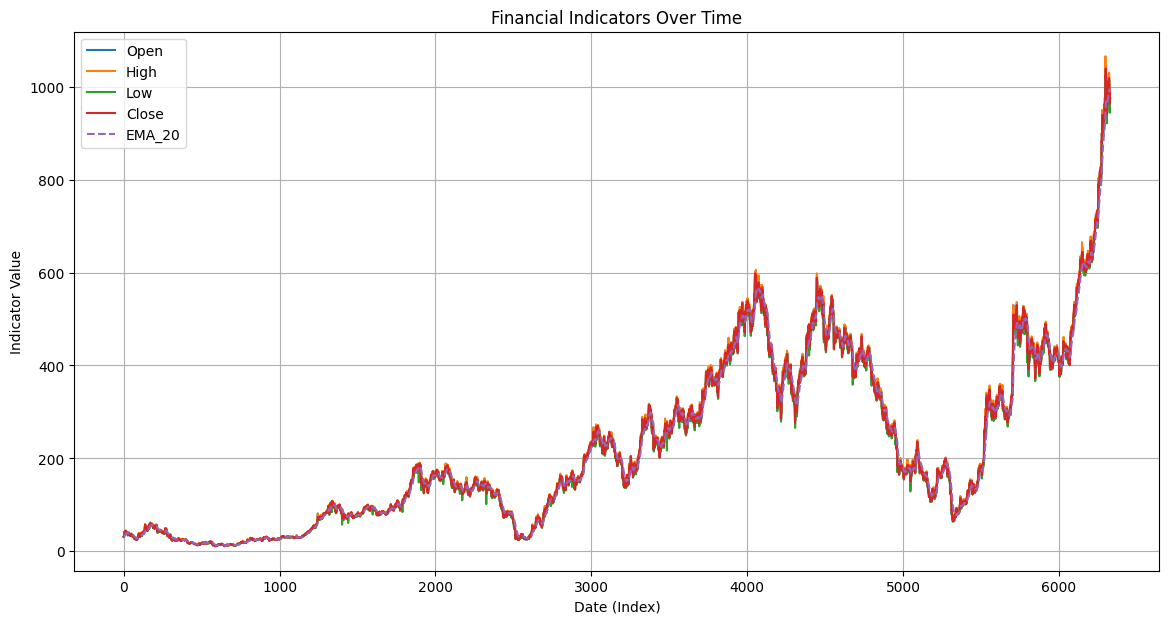

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Open'], label='Open')
plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.plot(df['Close'], label='Close')
plt.plot(df['EMA_20'], label='EMA_20', linestyle='--')

plt.title('Financial Indicators Over Time')
plt.xlabel('Date (Index)')
plt.ylabel('Indicator Value')
plt.legend()
plt.grid(True)
plt.show()


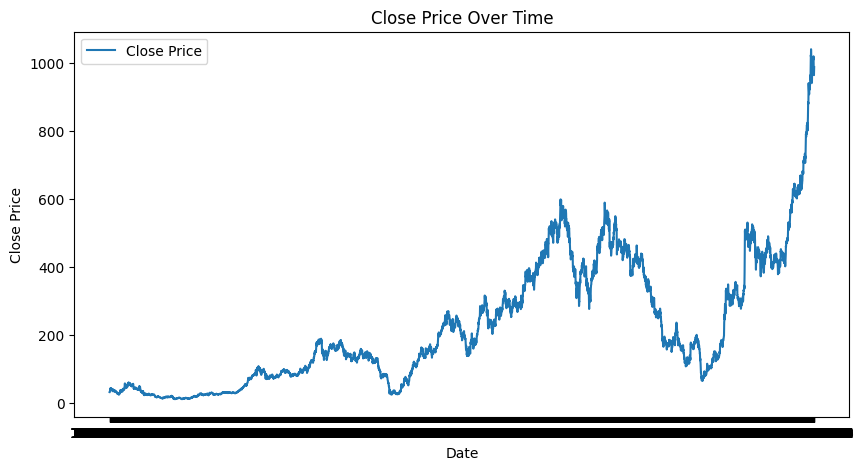

In [62]:
import matplotlib.pyplot as plt

# Plotting the 'Close' column
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.show()


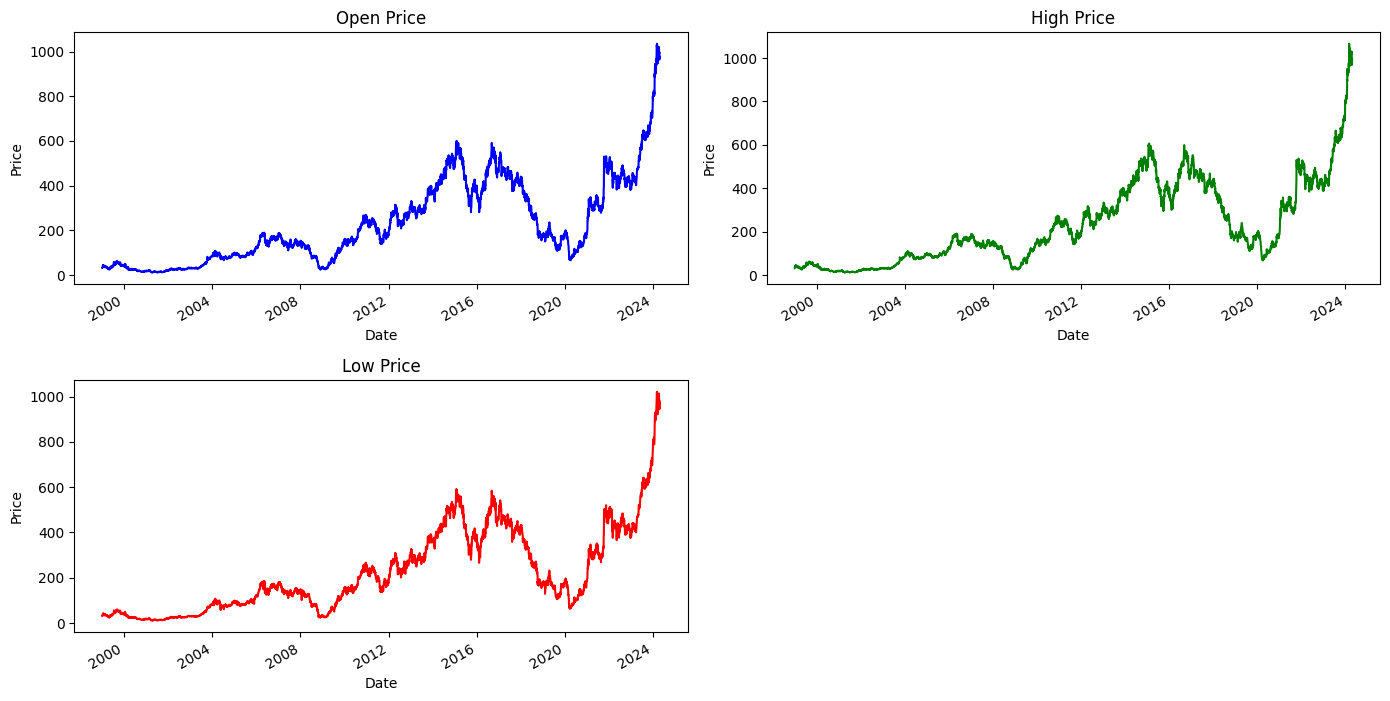

In [63]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as the index of the dataframe
df.set_index('Date', inplace=True)

# Plot each variable
plt.figure(figsize=(14, 10))

# Subplot for 'Open'
plt.subplot(3, 2, 1)
df['Open'].plot(title='Open Price', color='blue')
plt.ylabel('Price')

# Subplot for 'High'
plt.subplot(3, 2, 2)
df['High'].plot(title='High Price', color='green')
plt.ylabel('Price')

# Subplot for 'Low'
plt.subplot(3, 2, 3)
df['Low'].plot(title='Low Price', color='red')
plt.ylabel('Price')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [68]:
df.drop("Date", axis=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
0,31.599886,32.155613,31.053738,31.839424,24.766424,18835718
1,32.021473,32.663437,31.561560,31.676538,24.639723,18245781
2,31.714865,34.215645,31.283695,34.215645,26.614777,38938718
3,34.637230,35.317520,33.870708,35.221703,27.397339,40059886
4,35.269611,36.850563,35.164215,36.697258,28.545116,35983032
...,...,...,...,...,...,...
6324,990.000000,1004.900024,982.099976,992.799988,992.799988,9574762
6325,996.349976,1003.099976,966.250000,971.349976,971.349976,13540490
6326,964.000000,967.950012,944.000000,963.200012,963.200012,15381310
6327,978.750000,978.750000,966.000000,973.549988,973.549988,7187959


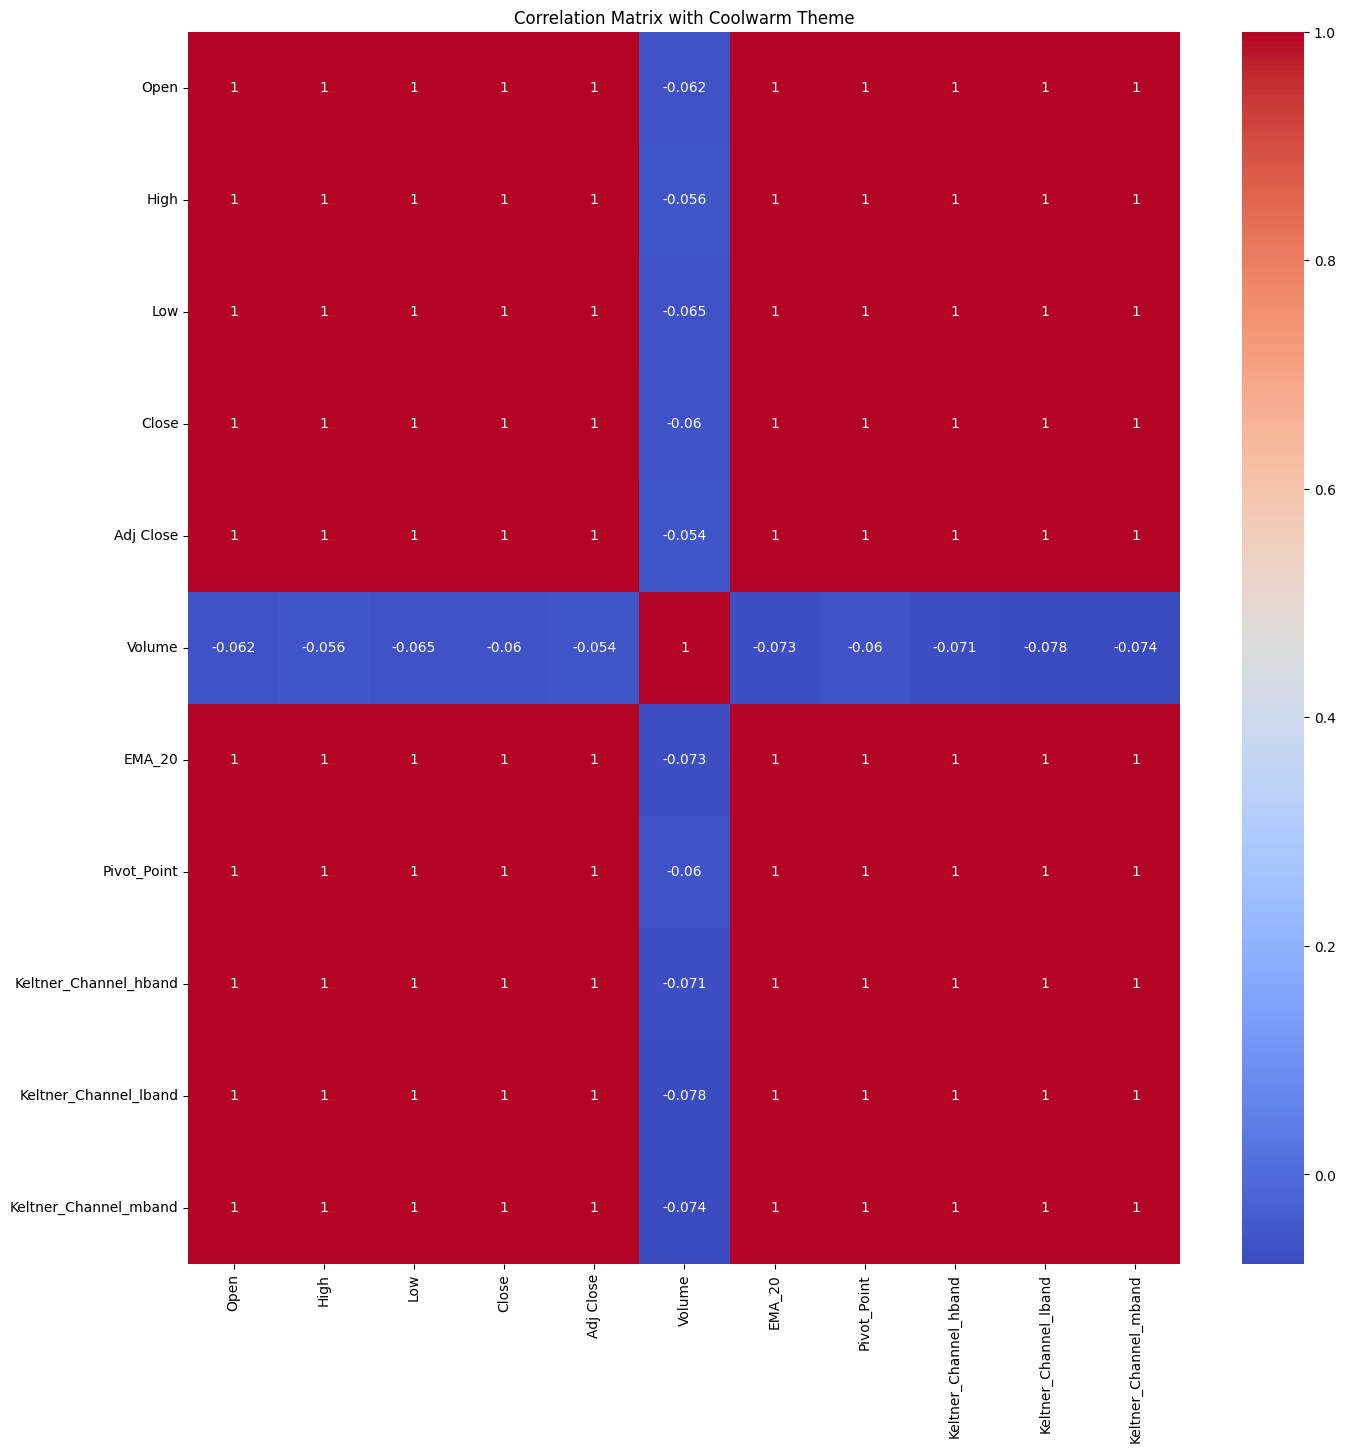

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix for the entire DataFrame
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Coolwarm Theme')
plt.show()


In [69]:
# Drop specified columns to create the feature set X
X = df.drop(["Open", "Close", "High", "Low"], axis=1)

# Create the target set y with specified columns
y = df[["Open", "Close", "High", "Low"]]



In [70]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
# Split the data for non-time series models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#cross-validation
# Define TimeSeriesSplit for models using GridSearchCV
tscv = TimeSeriesSplit(n_splits=5)

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor


# Initialize and setup models
models = {
    'GradientBoostingRegressor': MultiOutputRegressor(GradientBoostingRegressor(random_state=0)),
    'RandomForestRegressor': MultiOutputRegressor(RandomForestRegressor(random_state=0))
}

# Parameter grids for each model
param_grids = {
    'GradientBoostingRegressor': {'estimator__n_estimators': [100, 200], 'estimator__learning_rate': [0.05, 0.1], 'estimator__max_depth': [3, 5]},
    'RandomForestRegressor': {'estimator__n_estimators': [10, 50], 'estimator__max_features': ['auto', 'sqrt']}
}






GridSearchCV is a systematic way to search through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. to prevent overfittiing and bias

GridSearchCV is used with a TimeSeriesSplit to fine-tune the models' hyperparameters and validate their performance using time-based cross-validation.

In [72]:
# Fit models using GridSearchCV and store best models
best_models = {}
results = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    results[name] = grid_search.best_estimator_.predict(X_test)

Model evaluation

In [73]:
# Evaluate all models
for name, predictions in results.items():
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}\n")

GradientBoostingRegressor:
Mean Absolute Error: 30.027629130229613
R-squared: 0.8477301075779412

RandomForestRegressor:
Mean Absolute Error: 38.48915695987419
R-squared: 0.8032208244628982

